In [1]:
import pandas as pd
from time import sleep
from random import shuffle

In [18]:
import insta as IG
insta = IG.Instagram()
insta.login()

In [31]:
insta.get_follow('followers')

.............................................................

In [32]:
insta.get_follow('following')

..................................................................

In [6]:
insta.get_photos()

In [2]:
follower = pd.read_pickle('followers.pickle')
follower.shape

(913, 6)

In [3]:
following = pd.read_pickle('following.pickle')
following.shape

(1200, 6)

In [4]:
following = following.sort_values('time_first')
following_not_follower = [x for x in following[following['time_last'] == max(following['time_last'])]['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

270 ['zzmuddyking', 'simoncorbi', 'carol.giuss', 'alexandrevarela', 'bravustkitf', 'guanarugby', 'nicoguana', 'adrienchaltiel', 'akaciccio', 'martal.borges', 'bianca.moreirabm', 'leonardoloriato', 'thiagompc', 'tattutt', 'luiz_gustavo_rinke', 'psicologaclaracarr', 'gomessoaresrenata', 'henriqueqgalvao', 'mpinhanez', 'adrikahn', 'hugobcmt', 'jorge_porfirio_as', 'anaclarabcastro', 'andre.fernandes001', 'anaghis', 'marcellogt.rio', 'ngasparelli', 'thiago.l.campos', 'fernandesilvaantonio', 'savios.machado', 'leolenin1982', 'vollmermarcus', 'labasence', 'mitpics', 'juanita_rugby', 'anahissa', 'danielhrs', 'flavio.costa.357284', 'apolomvp', 'stellacaymmi', 'ojaysrugby', 'elianaalbernaz15', 'amandacpereira79', 'alfonso.jara.rojas', 'viniciuscabralpereira', 'worldeconomicforum', 'gal_gadot', 'jamilkpc', 'theeconomist', 'nt_157', 'marianaeloy', 'eshycoimbra', 'niteroi_rugbyoficial', 'luizmouraa', 'stelamarisrinke', 'victor.dahan', 'tamissouto', 'ravpons', 'emilia_sdo', 'andrehara7', 'bianca.ben

In [5]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

494 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [6]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,360,360,360,360,360
Seguir,533,533,533,533,533
Solicitado,20,20,20,20,20


In [7]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [8]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
912,2019-08-21 23:47:13.478628,2019-08-21 23:47:13.478628,richard_waterislife,richard_waterislife,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/392...
911,2019-08-21 23:47:13.478628,2019-08-21 23:47:13.478628,ninno_reis,Rapha Vilminha,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/934...
910,2019-08-21 23:29:03.710263,2019-08-21 23:47:13.478628,millefuielle,Cc:🌀,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/83f...
909,2019-08-21 23:29:03.710263,2019-08-21 23:47:13.478628,marielerodrigues524,Mariele Rodrigues,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/91b...
908,2019-08-21 23:29:03.710263,2019-08-21 23:47:13.478628,marc0s_rp,Marcos Roberto,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/4ca...
907,2019-08-21 23:29:03.710263,2019-08-21 23:47:13.478628,juniorrezende_,Junior Rezende,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/533...
906,2019-08-21 23:29:03.710263,2019-08-21 23:47:13.478628,gustavoguidetti,Gustavo Guidetti,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/efe...
905,2019-08-21 23:29:03.710263,2019-08-21 23:47:13.478628,pamella_regina2015,Pâmela Oliveira,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/82a...
904,2019-08-21 23:29:03.710263,2019-08-21 23:47:13.478628,nathiquintanilha,Nathalia Quintanilha,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/443...
897,2019-08-21 21:09:03.103660,2019-08-21 23:47:13.478628,niftycraftstudios,NIFTYCRAFTSTUDIO,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b06...


In [9]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...
474,2019-08-01 10:43:26.593775,2019-08-02 10:37:08.772824,adhy_inv,ADHY Investment,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/85d...


In [10]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
1199,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,frases953728,frases,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b67...
1197,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,michelepaulasantin,Michele Paula Santin,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/d5c...
1196,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,old_rio_photos,Old_Rio_Photos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/281...
1195,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,fluminensefc,Fluminense Football Club,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a81...
1194,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,startuprio,Startup Rio,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6eb...
1193,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,startupi,Startupi,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c6c...
1192,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,startupbr,Programa Startup Brasil,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b91...
1198,2019-08-21 23:52:42.289783,2019-08-21 23:52:42.289783,wconta_offdesativada,Conta Desativada,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a8f...
1187,2019-08-21 23:34:14.360305,2019-08-21 23:52:42.289783,brunaalvesv,Bruna Alvesb,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/4a4...
1183,2019-08-21 23:34:14.360305,2019-08-21 23:52:42.289783,jessicaalexsania,Jéssica Alexsânia,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/8e6...


In [11]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
578,2019-08-03 16:31:25.281430,2019-08-04 17:50:28.684857,globoesportecom,GloboEsporte.com,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3d2...
431,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,araujodiogoo,Diogo Araujo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/80...
590,2019-08-04 22:13:41.081369,2019-08-04 22:13:41.081369,bemartins.ml,Bernardo Martins,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6b9...
586,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,tami.bastos,Tami 🙋‍♀️,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1ab...
606,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,rick_f_r_a_s_e_s_,Ricardo Oliveira.❤,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/489...
608,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,renatacartagenes,Renata Cartagenes Ferreira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e33...
594,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,wsalvarani,Wagner Salvarani,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b2f...
621,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,tatiperotti,Tati Perotti,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b91...
630,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,thalitailva,Thalita Silva,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/c15...


In [12]:
following[following['time_last'] == max(following['time_last'])].sort_values('time_first')

,time_first,time_last,username,name,status,img
363,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,fredbpego,Fred,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/9e...
102,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,zedouglasbh,Jose Douglas da Silva,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/50...
104,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,gilmariosantosco,Gilmário santos conrado,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/ec...
107,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,rclisamedeiros,Rê Cromwell,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/5f...
108,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,jun.fonseca,Junior,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
109,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,eu.thome,Tulio Thomé,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/8a...
111,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,camilabarretodealmeida,Camila Barreto de Almeida,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/a3...
114,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,biapeixoto08,Bia Peixoto,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/e5...
116,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,eduardopujol,Eduardo Pujol Junior,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/2e...
68,2019-07-30 10:29:44.220296,2019-08-21 23:52:42.289783,fgraca_lepsus,Felipe Graça,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/6e...


In [13]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [14]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
1285,2019-07-30 10:29:44.220296,2019-08-06 16:21:23.181522,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
860,2019-08-19 21:23:40.354401,2019-08-21 23:47:13.478628,19ray87,Rai Santos,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b12...
1407,2019-07-30 10:29:44.220296,2019-08-15 01:07:12.837244,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-09 08:32:17.126650,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
533,2019-08-04 17:25:00.382049,2019-08-21 23:47:13.478628,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
580,2019-08-06 18:13:11.314843,2019-08-21 23:47:13.478628,85millysantos,Jamilly Santos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/9e1...
620,2019-08-07 19:51:20.508949,2019-08-21 23:47:13.478628,______lor.rabbit,lor rabbit,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1be...
197,2019-07-29 22:30:54.216241,2019-08-21 23:47:13.478628,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
1616,2019-08-06 17:00:23.497341,2019-08-07 22:52:36.378524,_bimiranda,Bianca,Seguindo,https://instagram.fbtz1-5.fna.fbcdn.net/vp/b2d...


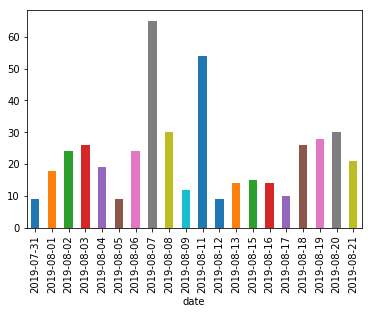

In [17]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[2:].plot(kind='bar')

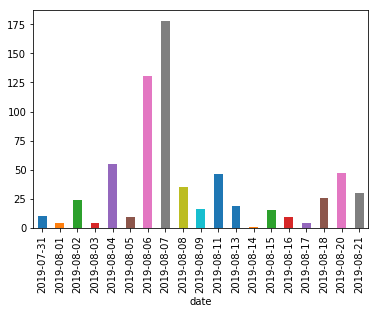

In [18]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')

In [19]:
#shuffle(following_not_follower)
following_not_follower


['zzmuddyking',
 'simoncorbi',
 'carol.giuss',
 'alexandrevarela',
 'bravustkitf',
 'guanarugby',
 'nicoguana',
 'adrienchaltiel',
 'akaciccio',
 'martal.borges',
 'bianca.moreirabm',
 'leonardoloriato',
 'thiagompc',
 'tattutt',
 'luiz_gustavo_rinke',
 'psicologaclaracarr',
 'gomessoaresrenata',
 'henriqueqgalvao',
 'mpinhanez',
 'adrikahn',
 'hugobcmt',
 'jorge_porfirio_as',
 'anaclarabcastro',
 'andre.fernandes001',
 'anaghis',
 'marcellogt.rio',
 'ngasparelli',
 'thiago.l.campos',
 'fernandesilvaantonio',
 'savios.machado',
 'leolenin1982',
 'vollmermarcus',
 'labasence',
 'mitpics',
 'juanita_rugby',
 'anahissa',
 'danielhrs',
 'flavio.costa.357284',
 'apolomvp',
 'stellacaymmi',
 'ojaysrugby',
 'elianaalbernaz15',
 'amandacpereira79',
 'alfonso.jara.rojas',
 'viniciuscabralpereira',
 'worldeconomicforum',
 'gal_gadot',
 'jamilkpc',
 'theeconomist',
 'nt_157',
 'marianaeloy',
 'eshycoimbra',
 'niteroi_rugbyoficial',
 'luizmouraa',
 'stelamarisrinke',
 'victor.dahan',
 'tamissouto'

In [48]:
for user in following_not_follower[50:150]:
    try:
        insta.unfollow_user(user)
        sleep(.3)
    except:
        print('unfollow ',user)

Unfollowing  dueumesmo
Unfollowing  raphaelyurivianna
Unfollowing  mcynthus
Unfollowing  katia.rocha.rj
Unfollowing  ngasparelli
Unfollowing  apolomvp
Unfollowing  lai.amaral
Unfollowing  gloria.vianna.37
Unfollowing  luiz_gustavo_rinke
Unfollowing  professoratamarayoga
Unfollowing  camilota1
Unfollowing  dricarneiroinrio
Unfollowing  pedro.mouracosta
Unfollowing  silvinaramal
Unfollowing  barrionuevomauro
Unfollowing  vollmermarcus
Unfollowing  angelamaria.rocha.71
Unfollowing  josemarcelopimenta
Unfollowing  fernando.hey
Unfollowing  psicologaclaracarr
Unfollowing  henriqueqgalvao
Unfollowing  monique.rj
Unfollowing  raspberrypifoundation
Unfollowing  marcosaraujo2005
Unfollowing  brk70
unfollow  paty_marques
Unfollowing  paulabcleite
Unfollowing  flavia.m.dos.anjos
Unfollowing  cecilsoares83
Unfollowing  nathsurf16
Unfollowing  clarasaddi
Unfollowing  mariliazangrandi
Unfollowing  camilansouto
Unfollowing  palhadoze
Unfollowing  nathiquintanilha
Unfollowing  vivijaccoud
Unfollowing 